## Dataset
Sources: https://rajpurkar.github.io/SQuAD-explorer/

In [0]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_colwidth', -1)  ## To look at full length text

In [0]:
squad=pd.read_json("/content/drive/My Drive/Colab Notebooks/train-squad-v2.0 (1).json")

In [3]:
squad.head()

,version,data
0,v2.0,"{'title': 'Beyoncé', 'paragraphs': [{'qas': [{..."
1,v2.0,"{'title': 'Frédéric_Chopin', 'paragraphs': [{'..."
2,v2.0,{'title': 'Sino-Tibetan_relations_during_the_M...
3,v2.0,"{'title': 'IPod', 'paragraphs': [{'qas': [{'qu..."
4,v2.0,{'title': 'The_Legend_of_Zelda:_Twilight_Princ...


## Converting .json file to a pandas dataframe
 Sources: https://www.kaggle.com/sanjay11100/squad-stanford-q-a-json-to-pandas-dataframe

In [0]:
def squad_json_to_dataframe_train(input_file_path, record_path = ['data','paragraphs','qas','answers'],
                           verbose = 1):
    """
    input_file_path: path to the squad json file.
    record_path: path to deepest level in json file default value is
    ['data','paragraphs','qas','answers']
    verbose: 0 to suppress it default is 1
    """
    if verbose:
        print("Reading the json file")    
    file = json.loads(open(input_file_path).read())
    if verbose:
        print("processing...")
    # parsing different level's in the json file
    js = pd.io.json.json_normalize(file , record_path )
    m = pd.io.json.json_normalize(file, record_path[:-1] )
    r = pd.io.json.json_normalize(file,record_path[:-2])
    
    #combining it into single dataframe
    idx = np.repeat(r['context'].values, r.qas.str.len())
    ndx  = np.repeat(m['id'].values,m['answers'].str.len())
    m['context'] = idx
    js['q_idx'] = ndx
    main = pd.concat([ m[['id','question','context']].set_index('id'),js.set_index('q_idx')],1,sort=False).reset_index()
    main['c_id'] = main['context'].factorize()[0]
    if verbose:
        print("shape of the dataframe is {}".format(main.shape))
        print("Done")
    return main


def squad_json_to_dataframe_dev(input_file_path, record_path = ['data','paragraphs','qas','answers'],
                           verbose = 1):
    """
    input_file_path: path to the squad json file.
    record_path: path to deepest level in json file default value is
    ['data','paragraphs','qas','answers']
    verbose: 0 to suppress it default is 1
    """
    if verbose:
        print("Reading the json file")    
    file = json.loads(open(input_file_path).read())
    if verbose:
        print("processing...")
    # parsing different level's in the json file
    js = pd.io.json.json_normalize(file , record_path )
    m = pd.io.json.json_normalize(file, record_path[:-1] )
    r = pd.io.json.json_normalize(file,record_path[:-2])
    
    #combining it into single dataframe
    idx = np.repeat(r['context'].values, r.qas.str.len())
#     ndx  = np.repeat(m['id'].values,m['answers'].str.len())
    m['context'] = idx
#     js['q_idx'] = ndx
    main = m[['id','question','context','answers']].set_index('id').reset_index()
    main['c_id'] = main['context'].factorize()[0]
    if verbose:
        print("shape of the dataframe is {}".format(main.shape))
        print("Done")
    return main

In [6]:
# training data
input_file_path = '/content/drive/My Drive/Colab Notebooks/train-squad-v2.0 (1).json'
record_path = ['data','paragraphs','qas','answers']
train = squad_json_to_dataframe_train(input_file_path=input_file_path,record_path=record_path)

Reading the json file
processing...
shape of the dataframe is (130319, 6)
Done


In [27]:
train.head(1)

,index,question,context,text,answer_start,c_id,question_length
0,56be85543aeaaa14008c9063,When did Beyonce start becoming popular?,"Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, the group became one of the world's best-selling girl groups of all time. Their hiatus saw the release of Beyoncé's debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles ""Crazy in Love"" and ""Baby Boy"".",in the late 1990s,269.0,0,6


In [29]:
train['question_length']=train['question'].apply(lambda x: len(x.split()))
train['context_length']=train['context'].apply(lambda x: len(x.split()))
train['answer_length']=train['text'].apply(lambda x: len(str(x).split()))


Index(['index', 'question', 'context', 'text', 'answer_start', 'c_id',
       'question_length', 'context_length', 'answer_length'],
      dtype='object')

##### https://github.com/priya-dwivedi/cs224n-Squad-Project/blob/master/analysis_data_length.ipynb

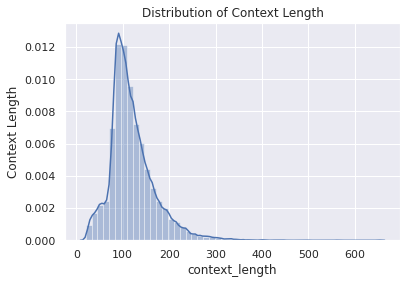

In [32]:
sns.set(color_codes=True)
ax = sns.distplot(train['context_length'])
ax.set_title('Distribution of Context Length')
ax.set_ylabel('Context Length')
plt.savefig('context_length.png')
plt.show()


In [45]:
print(max(train['context_length']))
print(min(train['context_length']))
print(np.mean(train['context_length']))
print(np.median(train['context_length']))

653
20
119.61431564085053
110.0


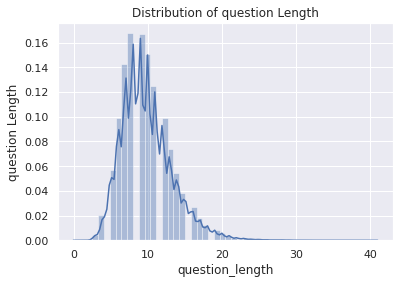

In [42]:
sns.set(color_codes=True)
ax = sns.distplot(train['question_length'])
ax.set_title('Distribution of question Length')
ax.set_ylabel('question Length')
plt.savefig('question_length.png')
plt.show()


In [46]:
print(max(train['question_length']))
print(min(train['question_length']))
print(np.mean(train['question_length']))
print(np.median(train['question_length']))

40
1
9.893822082735442
9.0


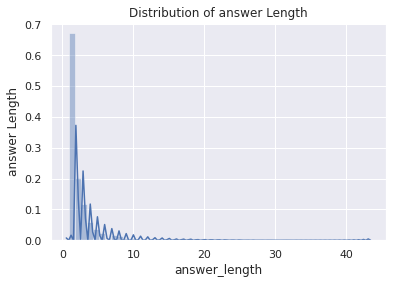

In [41]:
sns.set(color_codes=True)
ax = sns.distplot(train['answer_length'])
ax.set_title('Distribution of answer Length')
ax.set_ylabel('answer Length')
plt.savefig('answer_length.png')
plt.show()


In [47]:
print(max(train['answer_length']))
print(min(train['answer_length']))
print(np.mean(train['answer_length']))
print(np.median(train['answer_length']))

43
1
2.4408796875359693
1.0


## Observations


1.   Context is of 100-200 words. max:653, mean:119, median: 119, min:20
2.   Question Length.              max:40, mean:10, median: 9 ,   min:1
3.   Answer Length                 max:43, mean:3, median: 1  ,  min:1

